In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
import os, random, sys, time
from urllib.parse import urlparse
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
import re
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df1 = pd.DataFrame(pd.read_excel('TJT_datasets.xlsx'))

In [5]:
df1.head()

,JID,Jcompany,Jposition,Jdesc,Jlocation,Jfunction,Jkeywords,Jtkey
0,12,Freshworks,Senior Product Manager,Freshworks Inc. is the parent company behind t...,"Chennai, India",Product Management,"Customer-facing teams, leadership team,owner",NaN
1,19,ServiceNow,Senior Product Manager- Analytics,Company\n\nWork matters. It’s where we spend a...,"Hyderabad, IN",Product Management,"Performance Analytics, Reporting team",NaN


In [6]:
df = pd.DataFrame(index=[0], columns=df1.columns)
df

,JID,Jcompany,Jposition,Jdesc,Jlocation,Jfunction,Jkeywords,Jtkey
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
jobid = int(input("Enter Job ID:"))
for i in range(len(df1)):
    if jobid == df1['JID'][i]:
        for j in range(8):
            df[df1.columns[j]][0] = df1[df1.columns[j]][i]
df
        

Enter Job ID:12


,JID,Jcompany,Jposition,Jdesc,Jlocation,Jfunction,Jkeywords,Jtkey
0,12,Freshworks,Senior Product Manager,Freshworks Inc. is the parent company behind t...,"Chennai, India",Product Management,"Customer-facing teams, leadership team,owner",NaN


In [8]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [9]:
df['Jdesc'][0]

"Freshworks Inc. is the parent company behind the suite of products which includes Freshdesk, Freshservice, Freshsales, Freshcaller, Freshteam, Freshchat, and Freshmarketer. The company’s suite of products is designed to work tightly together to increase collaboration and help teams better connect and communicate with their customers and co-workers. Founded in October 2010, Freshworks Inc. is backed by Accel, Tiger Global Management, CapitalG, and Sequoia Capital India. Freshworks has its HQ in San Bruno, California and global offices in India, UK, Australia, and Germany. The company's cloud-based suite of SaaS products is widely used by over 100,000 customers around the world including Honda, Bridgestone, Hugo Boss, University of Pennsylvania, Toshiba and Cisco.\n\nWe are looking to hire a smart product manager who is passionate about taking up ideas and bringing them to life. You will engage with our customer base directly, and decide the future of the product by working closely with

In [19]:
corpus=[' '.join(text_process(df['Jdesc'][0].split('skills')[1:]))]
corpus

['translating customer needs product functionalities. Work leadership team planning product roadmap. Convert ideas prototypes demonstrate key partners. Coordinate engineering team plan deliver features time. Represent company product domain-specific conferences events. Stay top market competitions. Act like owner success product. Requirement minimum 6+yrs experience product management similar role people-friendly person extraordinary organizational leadership strong presentation Ability think creatively solve problem Familiarity agile development framework preferable. Prior experience development program management plus Seniority Level Associate']

                    Bi-gram  Freq
0      translating customer     1
1            customer needs     1
2             needs product     1
3   product functionalities     1
4      functionalities work     1
5           work leadership     1
6           leadership team     1
7             team planning     1
8          planning product     1
9           product roadmap     1
10          roadmap convert     1
11            convert ideas     1
12         ideas prototypes     1
13   prototypes demonstrate     1
14          demonstrate key     1
15             key partners     1
16      partners coordinate     1
17   coordinate engineering     1
18         engineering team     1
19                team plan     1


[Text(0, 0, 'translating customer'),
 Text(0, 0, 'customer needs'),
 Text(0, 0, 'needs product'),
 Text(0, 0, 'product functionalities'),
 Text(0, 0, 'functionalities work'),
 Text(0, 0, 'work leadership'),
 Text(0, 0, 'leadership team'),
 Text(0, 0, 'team planning'),
 Text(0, 0, 'planning product'),
 Text(0, 0, 'product roadmap'),
 Text(0, 0, 'roadmap convert'),
 Text(0, 0, 'convert ideas'),
 Text(0, 0, 'ideas prototypes'),
 Text(0, 0, 'prototypes demonstrate'),
 Text(0, 0, 'demonstrate key'),
 Text(0, 0, 'key partners'),
 Text(0, 0, 'partners coordinate'),
 Text(0, 0, 'coordinate engineering'),
 Text(0, 0, 'engineering team'),
 Text(0, 0, 'team plan')]

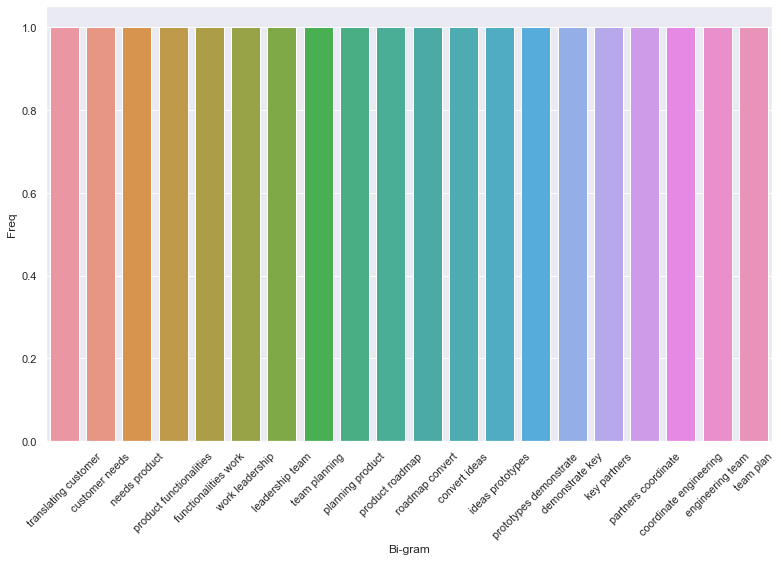

In [20]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                           Tri-gram  Freq
0        translating customer needs     1
1            customer needs product     1
2     needs product functionalities     1
3      product functionalities work     1
4   functionalities work leadership     1
5              work leadership team     1
6          leadership team planning     1
7             team planning product     1
8          planning product roadmap     1
9           product roadmap convert     1
10            roadmap convert ideas     1
11         convert ideas prototypes     1
12     ideas prototypes demonstrate     1
13       prototypes demonstrate key     1
14         demonstrate key partners     1
15          key partners coordinate     1
16  partners coordinate engineering     1
17      coordinate engineering team     1
18            engineering team plan     1
19                team plan deliver     1


[Text(0, 0, 'translating customer needs'),
 Text(0, 0, 'customer needs product'),
 Text(0, 0, 'needs product functionalities'),
 Text(0, 0, 'product functionalities work'),
 Text(0, 0, 'functionalities work leadership'),
 Text(0, 0, 'work leadership team'),
 Text(0, 0, 'leadership team planning'),
 Text(0, 0, 'team planning product'),
 Text(0, 0, 'planning product roadmap'),
 Text(0, 0, 'product roadmap convert'),
 Text(0, 0, 'roadmap convert ideas'),
 Text(0, 0, 'convert ideas prototypes'),
 Text(0, 0, 'ideas prototypes demonstrate'),
 Text(0, 0, 'prototypes demonstrate key'),
 Text(0, 0, 'demonstrate key partners'),
 Text(0, 0, 'key partners coordinate'),
 Text(0, 0, 'partners coordinate engineering'),
 Text(0, 0, 'coordinate engineering team'),
 Text(0, 0, 'engineering team plan'),
 Text(0, 0, 'team plan deliver')]

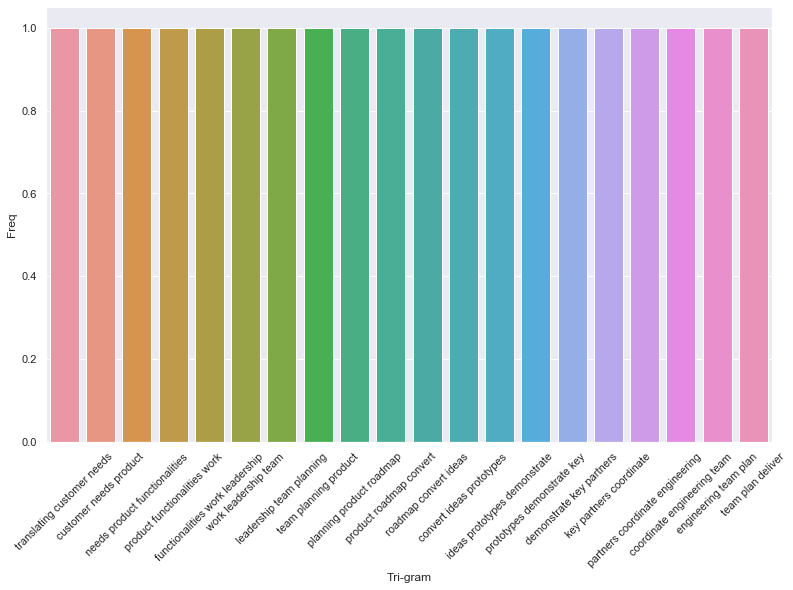

In [25]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)


In [22]:
step2a_df = pd.DataFrame(index=[0],columns=['Company Name', 'Job Location', 'Headquarter', 'Company Details', 'Job Title', 'Roles', 'Skills', 'PHM'])
step2a_df

,Company Name,Job Location,Headquarter,Company Details,Job Title,Roles,Skills,PHM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
for i in df:
    if 'company' in i:
        step2a_df['Company Name'][0] = df[i][0]
    if 'location' in i:
        step2a_df['Job Location'][0] = df[i][0]
    if 'role' in i or 'function' in i:
        step2a_df['Roles'][0] = df[i][0]
    if 'position' in i or 'title' in i:
        step2a_df['Job Title'][0] = df[i][0]
    if 'skills' in i:
        step2a_df['Skills'][0] = df[i][0]
    #if 'desc' in i or 'description' in i:
        #step2a_df['Skills'][0] = df[i][0]

In [42]:
step2a_df

,Company Name,Job Location,Headquarter,Company Details,Job Title,Roles,Skills,PHM
0,Freshworks,"Chennai, India",NaN,NaN,Senior Product Manager,Product Management,NaN,NaN


## Web Scrapping

In [32]:
#import ipywidgets as widgets
#company_name = widgets.Dropdown(step2a_df['Company Name'])

In [33]:
browser = webdriver.Chrome('driver/chromedriver.exe')

In [34]:
browser.get('https://www.linkedin.com/uas/login')

In [35]:
file = open('config.txt')
lines = file.readlines()
username = lines[0]
password = lines[1]

In [36]:
elementID = browser.find_element_by_id('username')
elementID.send_keys(username)

In [37]:
elementID = browser.find_element_by_id('password')
elementID.send_keys(password)

In [38]:
elementID.submit()

In [44]:
company_name = df['Jcompany']
#company_name='Freshworks'
fullLink = 'https://www.linkedin.com/search/results/companies/?keywords='+company_name
browser.get(fullLink)

Enter Company Name:Sapient


In [45]:
element = browser.find_element_by_link_text(company_name) 
element.click() 
time.sleep(5)

In [46]:
browser.execute_script("window.scrollTo(0, 500)") 
element = browser.find_element_by_link_text("See all") 
element.click() 

# Company Details

In [47]:
time.sleep(5)
company_details = browser.find_element_by_class_name('break-words').text
step2a_df['Company Details']= company_details

# Company Headquarters

In [48]:
company_headquarters = browser.find_element_by_class_name('mb3').find_element_by_class_name('overflow-hidden').find_element_by_xpath('(//dd[5])').text
step2a_df['Headquarter']=company_headquarters

In [39]:
PHM = pd.DataFrame(pd.read_csv('C:/Users/Divya/PHM.csv'))
for i in range(len(PHM['Interviewee'])):
    if PHM['Interviewee'][i] == step2a_df['Job Title'][0]:
        step2a_df['PHM'][0]=PHM['Hiring Manager'][i]
step2a_df

,Company Name,Job Location,Headquarter,Company Details,Job Title,Roles,Skills,PHM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Potential Hiring Manager

In [50]:
def check_empty(data):
    if data == '':
        return ''
    else:
        return data + '%2C'

In [51]:
PHM = step2a_df['PHM'][0]
location = step2a_df['Job Location'][0]
domain = step2a_df['Roles'][0]
temp_url = check_empty(PHM) + check_empty(location) + check_empty(domain)
fullLink = browser.current_url[:-6] + '/people/?keywords=' +  temp_url[:-3]
browser.get(fullLink)

In [52]:
PHM_df = pd.DataFrame(index=[i for i in range(10)],columns=['Employee Name', 'Job Title', 'Job Location', 'About'])
PHM_df.head()

,Employee Name,Job Title,Job Location,About
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [53]:
current_url = browser.current_url
for i in range(1,14):
    try:    
        if i > 12:
            browser.execute_script("window.scrollTo(0, 1500)")
            time.sleep(3)
        browser.find_element_by_class_name('org-people-profiles-module__profile-list').find_element_by_xpath('(//li[@class="org-people-profiles-module__profile-item"]['+str(i)+'])').find_element_by_class_name('org-people-profile-card__profile-info').click()
        time.sleep(3)
        PHM_df['Employee Name'][i-1] = browser.find_element_by_class_name('pv-top-card--list').find_element_by_tag_name('li').text
        PHM_df['Job Title'][i-1] = browser.find_element_by_class_name('ph5').find_element_by_class_name('mt2').find_element_by_class_name('mt1').text
        loc = browser.find_element_by_class_name('pv-top-card--list-bullet').find_element_by_tag_name('li').text
        if "connection" in loc:
            PHM_df['Job Location'][i-1] = np.nan
        else:
            PHM_df['Job Location'][i-1] = loc
        PHM_df['About'][i-1] = browser.find_element_by_class_name('pv-about__summary-text').text
    except:
        pass
    browser.get(current_url)



In [54]:
PHM_df

,Employee Name,Job Title,Job Location,About
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [55]:
PHM_df=PHM_df.dropna(how='all')
PHM_df = PHM_df.reset_index(drop=True)

In [56]:
scores_df = pd.DataFrame({'scores':[0] * len(PHM_df)})
scores_df.head()

,scores


In [57]:
for i in range(len(PHM_df)):
    #Scoring based on About Section
    if str(np.nan) in str(PHM_df['About'][i]):
        scores_df['scores'][i] = 1
    elif 'hiring' or 'hire' or 'recruiting' or 'recruitment' in str(PHM_df['About'][i]):
        scores_df['scores'][i] = 3
    else:
        scores_df['scores'][i] = 2
        
    #Scoring based on Location 
    if str(np.nan) in str(PHM_df['Job Location'][i]):
        scores_df['scores'][i] += 1
    elif 'chennai' in str(PHM_df['Job Location'][i]).lower(): #take chennai from dataframe on employee use split(',')[0] to take only chennai
        scores_df['scores'][i] += 3
    else:
        scores_df['scores'][i] += 2
    
    #Scoring based on domain
    if str(np.nan) in str(PHM_df['Job Title'][i]):
        scores_df['scores'][i] += 1
    elif 'Product Management' in str(PHM_df['Job Title'][i]): #take prodcut management from dataframe on employee
        scores_df['scores'][i] += 3
    else:
        scores_df['scores'][i] += 2
    

In [58]:
scores_df


,scores


In [59]:
scores_df.sort_values(by=['scores'], inplace=True, ascending=False)
scores_df

,scores


In [60]:
#Top 3 PHM's
top3 = scores_df.index.values[:3]
top3_df = pd.DataFrame(columns=['Employee Name', 'Job Title', 'Job Location', 'About'])
for i in range(len(top3)):
    top3_df  = top3_df.append(PHM_df.iloc[top3[i]])
top3_df = top3_df.reset_index(drop=True)
top3_df

,Employee Name,Job Title,Job Location,About
